In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [12]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

In [13]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FCAE5DD9A00>


In [14]:
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 - Pre-Trained Convolutional Neural Networks

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [15]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [16]:
X = preprocess_input(X)

In [17]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [15]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453565))]]

# 8.4 - Convolutional Neural Networks

# 8.5 - Transfer Learning

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
X, y = next(train_ds)

In [19]:
X

array([[[[-0.6156863 , -0.8745098 , -0.7411765 ],
         [-0.60784316, -0.8745098 , -0.7411765 ],
         [-0.60784316, -0.8745098 , -0.7411765 ],
         ...,
         [-0.58431375, -0.88235295, -0.7647059 ],
         [-0.5921569 , -0.8901961 , -0.77254903],
         [-0.6       , -0.8980392 , -0.78039217]],

        [[-0.5921569 , -0.85882354, -0.7254902 ],
         [-0.5764706 , -0.8666667 , -0.7254902 ],
         [-0.5764706 , -0.8666667 , -0.7254902 ],
         ...,
         [-0.5529412 , -0.8745098 , -0.7490196 ],
         [-0.5686275 , -0.8901961 , -0.7647059 ],
         [-0.5686275 , -0.8901961 , -0.7647059 ]],

        [[-0.5764706 , -0.8666667 , -0.7254902 ],
         [-0.56078434, -0.8666667 , -0.7176471 ],
         [-0.5372549 , -0.8666667 , -0.70980394],
         ...,
         [-0.5529412 , -0.8901961 , -0.75686276],
         [-0.5529412 , -0.8901961 , -0.75686276],
         [-0.5529412 , -0.8901961 , -0.75686276]],

        ...,

        [[-0.44313723, -0.827451  , -0

In [20]:
X.shape

(32, 150, 150, 3)

In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32, 
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [20]:
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
)

base_model.trainable=False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [26]:
# haven't trained it yet, the preds are random

preds.shape

(32, 10)

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.5880 - loss: 1.4180 - val_accuracy: 0.7947 - val_loss: 0.6967
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8418 - loss: 0.5149 - val_accuracy: 0.8182 - val_loss: 0.7497
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8755 - loss: 0.3491 - val_accuracy: 0.7889 - val_loss: 0.8538
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9251 - loss: 0.1948 - val_accuracy: 0.8065 - val_loss: 0.8287
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9542 - loss: 0.1261 - val_accuracy: 0.7859 - val_loss: 0.8537
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9651 - loss: 0.1097 - val_accuracy: 0.7947 - val_loss: 0.8880
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9456 - loss: 0.1743 - val_accuracy: 0.8006 - val_loss: 1.0739
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9742 - loss: 0.0840 - val_accuracy: 0.7977 - val_loss: 

In [29]:
history.history

{'accuracy': [0.6724250316619873,
  0.8230117559432983,
  0.8758148550987244,
  0.9194915294647217,
  0.949804425239563,
  0.9517601132392883,
  0.9442633390426636,
  0.9768579006195068,
  0.9859843254089355,
  0.9908735156059265],
 'loss': [1.1566108465194702,
  0.5789414048194885,
  0.35806378722190857,
  0.219547301530838,
  0.13179530203342438,
  0.1386091113090515,
  0.17482595145702362,
  0.0761149525642395,
  0.05419721081852913,
  0.03640330955386162],
 'val_accuracy': [0.7947214245796204,
  0.8181818127632141,
  0.7888563275337219,
  0.8064516186714172,
  0.7859237790107727,
  0.7947214245796204,
  0.8005865216255188,
  0.7976539731025696,
  0.8181818127632141,
  0.8005865216255188],
 'val_loss': [0.6966895461082458,
  0.7496879696846008,
  0.853751540184021,
  0.8286598324775696,
  0.8537460565567017,
  0.8879817128181458,
  1.073854684829712,
  0.8808722496032715,
  0.8827568292617798,
  1.042556881904602]}

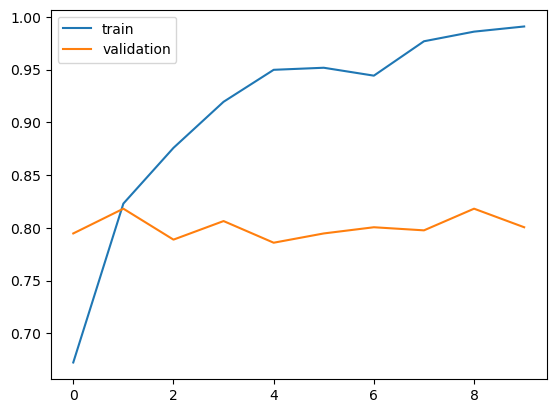

In [30]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()

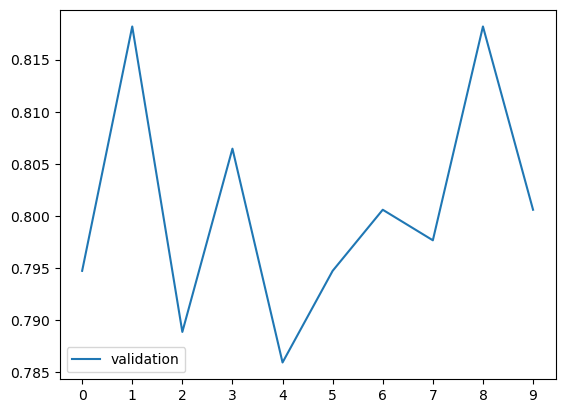

In [31]:
plt.plot(history.history['val_accuracy'], label='validation')
plt.xticks(np.arange(10))

plt.legend()

# 8.6 - Adjusting the Learning Rate

In [32]:
def make_model(learning_rate = 0.01):
    
    base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
    )
    
    base_model.trainable=False
    
    #########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:

    print(lr)
    model = make_model(learning_rate = lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.3409 - loss: 2.0391 - val_accuracy: 0.4575 - val_loss: 1.5594
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5203 - loss: 1.4542 - val_accuracy: 0.6158 - val_loss: 1.2347
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.6137 - loss: 1.1843 - val_accuracy: 0.6657 - val_loss: 1.0644
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6639 - loss: 1.0415 - val_accuracy: 0.7097 - val_loss: 0.9566
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6977 - loss: 0.9171 - val_accuracy: 0.7155 - val_loss: 0.8832
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7318 - loss: 0.8296 - val_accuracy: 0.7537 - val_loss: 0.8287
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7497 - loss: 0.7880 - val_accuracy: 0.7595 - val_loss: 0.7903
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7487 - loss: 0.7487 - val_accuracy: 0

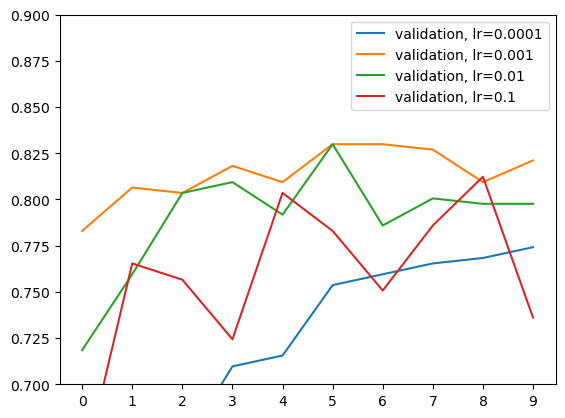

In [34]:
for lr, hist in scores.items():

    # plt.plot(hist['accuracy'], label=f'training, lr={lr}')
    plt.plot(hist['val_accuracy'], label=f'validation, lr={lr}')
    plt.xticks(np.arange(10))
    plt.ylim(0.7, 0.9)
    
    
    plt.legend()

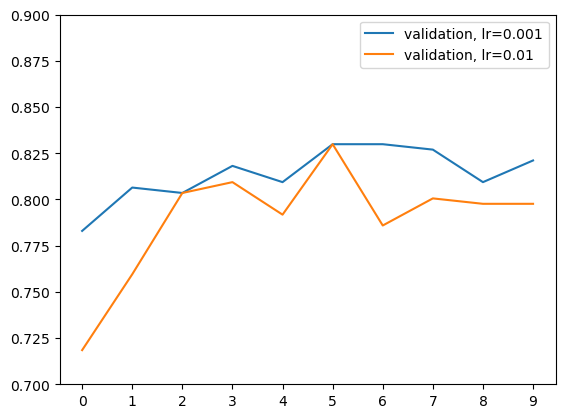

In [35]:
del scores[0.0001]
del scores[0.1]

for lr, hist in scores.items():

    plt.plot(hist['val_accuracy'], label=f'validation, lr={lr}')
    plt.xticks(np.arange(10))
    plt.ylim(0.7, 0.9)
    
    
    plt.legend()

In [36]:
learning_rate = 0.001

# 8.7 - Checkpointing

In [41]:
model.save_weights('model_v1.weights.h5')

In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max'
)

In [43]:
learning_rate = 0.001

model = make_model(learning_rate = learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds, 
    callbacks=[checkpoint]
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5197 - loss: 1.4480

96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.5209 - loss: 1.4442 - val_accuracy: 0.7507 - val_loss: 0.7661
Epoch 2/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7866 - loss: 0.6358

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7865 - loss: 0.6357 - val_accuracy: 0.7977 - val_loss: 0.6433
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8266 - loss: 0.5160

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8267 - loss: 0.5159 - val_accuracy: 0.8035 - val_loss: 0.6220
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8703 - loss: 0.4205

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8702 - loss: 0.4206 - val_accuracy: 0.8065 - val_loss: 0.5767
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8925 - loss: 0.3614 - val_accuracy: 0.8035 - val_loss: 0.5467
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9066 - loss: 0.3159

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9065 - loss: 0.3160 - val_accuracy: 0.8152 - val_loss: 0.5449
Epoch 7/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9220 - loss: 0.2815

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9219 - loss: 0.2817 - val_accuracy: 0.8240 - val_loss: 0.5504
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9380 - loss: 0.2393 - val_accuracy: 0.8240 - val_loss: 0.5328
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9464 - loss: 0.2315

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9464 - loss: 0.2316 - val_accuracy: 0.8270 - val_loss: 0.5410
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9546 - loss: 0.2001 - val_accuracy: 0.8123 - val_loss: 0.5498


# 8.8 - Adding More Layers

In [21]:
def make_model(learning_rate = 0.01, size_inner=100):
    
    base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
    )
    
    base_model.trainable=False
    
    #########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:

    print(size)
    model = make_model(learning_rate = learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.3522 - loss: 1.8584 - val_accuracy: 0.5572 - val_loss: 1.2353
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6148 - loss: 1.1200 - val_accuracy: 0.7507 - val_loss: 0.7826
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7595 - loss: 0.7091 - val_accuracy: 0.8035 - val_loss: 0.6643
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8131 - loss: 0.5789 - val_accuracy: 0.7771 - val_loss: 0.6469
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8371 - loss: 0.4902 - val_accuracy: 0.8123 - val_loss: 0.5826
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8660 - loss: 0.4412 - val_accuracy: 0.7742 - val_loss: 0.6185
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8793 - loss: 0.3846 - val_accuracy: 0.8006 - val_loss: 0.5671
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9103 - loss: 0.3231 - val_accuracy: 0.803

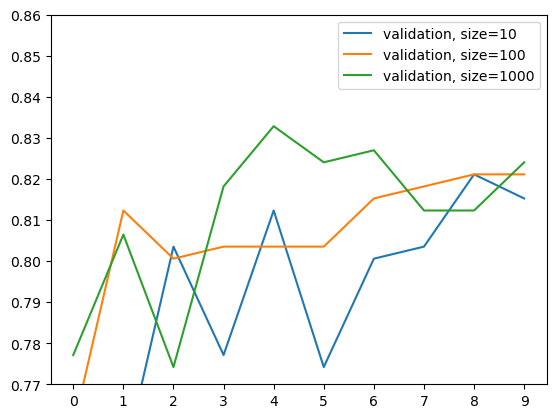

In [54]:
for size, hist in scores.items():

    plt.plot(hist['val_accuracy'], label=f'validation, size={size}')
    plt.xticks(np.arange(10))
    plt.ylim(0.77, 0.86)
    
    
    plt.legend()

# 8.9 - Regularization and Dropout

In [22]:
def make_model(learning_rate = 0.01, size_inner=100, droprate=0.5):
    
    base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
    )
    
    base_model.trainable=False
    
    #########################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [23]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:

    print(droprate)
    model = make_model(
        learning_rate = learning_rate, 
        size_inner=size, 
        droprate=droprate
    )
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 194ms/step - accuracy: 0.5772 - loss: 1.2757 - val_accuracy: 0.7801 - val_loss: 0.6976
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8258 - loss: 0.5004 - val_accuracy: 0.7977 - val_loss: 0.6182
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8829 - loss: 0.3533 - val_accuracy: 0.8123 - val_loss: 0.5472
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9303 - loss: 0.2383 - val_accuracy: 0.8094 - val_loss: 0.5731
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9540 - loss: 0.1702 - val_accuracy: 0.8065 - val_loss: 0.5744
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9729 - loss: 0.1353 - val_accuracy: 0.8035 - val_loss: 0.5998
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9868 - loss: 0.0879 - val_accuracy: 0.8152 - val_loss: 0.6103
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9944 - loss: 0.0601 - val_accuracy: 0.8065 - val_loss: 

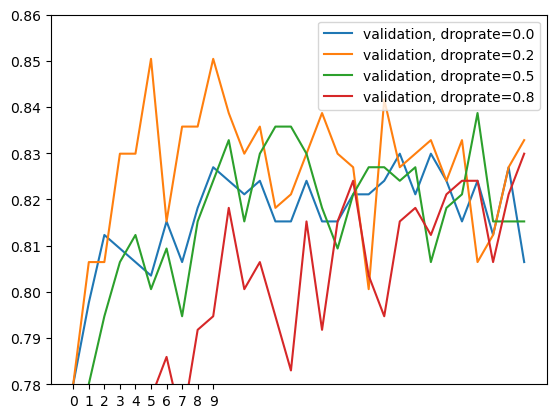

In [25]:
for droprate, hist in scores.items():

    plt.plot(hist['val_accuracy'], label=f'validation, droprate={droprate}')
    plt.xticks(np.arange(10))
    plt.ylim(0.78, 0.86)
    
    
    plt.legend()

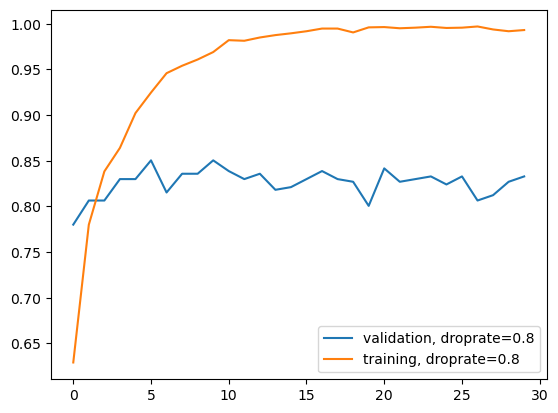

In [30]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=f'validation, droprate={droprate}')
plt.plot(hist['accuracy'], label=f'training, droprate={droprate}')

plt.legend()

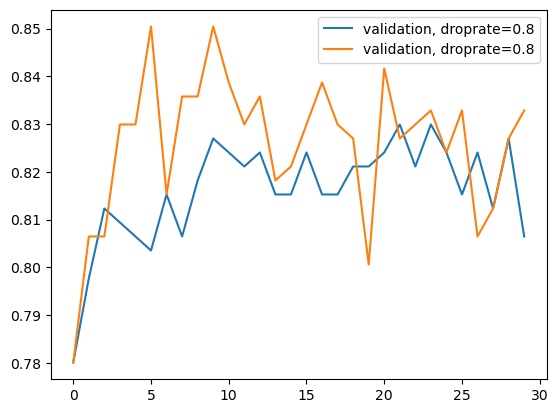

In [31]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=f'validation, droprate={droprate}')

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=f'validation, droprate={droprate}')

plt.legend()

# 8.10 - Data Augmentation

In [19]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               # rotation_range=30,
                               # width_shift_range=10.0,
                               # height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                                         target_size=(150,150),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                                         target_size=(150,150),
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
# learning_rate = 0.001
# size = 100
# droprate = 0.2

# model = make_model(
#         learning_rate = learning_rate, 
#         size_inner=size, 
#         droprate=droprate
#     )
    
# history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
# hist = history.history

# plt.plot(hist['accuracy'], label='train')
# plt.plot(hist['val_accuracy'], label='validation')

# plt.legend()

In [29]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                                         target_size=(150,150),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                                         target_size=(150,150),
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [30]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
        learning_rate = learning_rate, 
        size_inner=size, 
        droprate=droprate
    )
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.4812 - loss: 1.5634 - val_accuracy: 0.7654 - val_loss: 0.7412
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7139 - loss: 0.8458 - val_accuracy: 0.7537 - val_loss: 0.6955
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7597 - loss: 0.7155 - val_accuracy: 0.7977 - val_loss: 0.5986
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7987 - loss: 0.6000 - val_accuracy: 0.8006 - val_loss: 0.5812
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8076 - loss: 0.5529 - val_accuracy: 0.7918 - val_loss: 0.5817
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8356 - loss: 0.4882 - val_accuracy: 0.8152 - val_loss: 0.5905
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8608 - loss: 0.4279 - val_accuracy: 0.8182 - val_loss: 0.5850
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8656 - loss: 0.3863 - val_accuracy: 0.8152 -

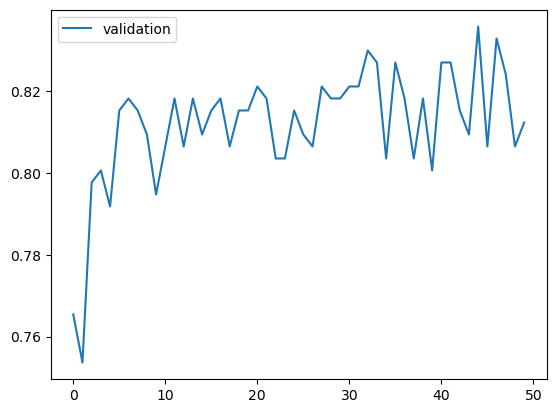

In [32]:
hist = history.history

# plt.plot(hist['accuracy'], label='train')
plt.plot(hist['val_accuracy'], label='validation')

plt.legend()

# 8.11 - Training a Larger Model

In [12]:
def make_model(input_size=150, learning_rate = 0.01, size_inner=100, droprate=0.5):
    
    base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(input_size, input_size, 3)
    )
    
    base_model.trainable=False
    
    #########################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [35]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1, 
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train',
                                         target_size=(input_size, input_size),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation',
                                         target_size=(input_size, input_size),
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5', 
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max'
)

In [28]:
input_size = 299

In [38]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
        input_size=input_size,
        learning_rate = learning_rate, 
        size_inner=size, 
        droprate=droprate
    )
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint]
                   )

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 636ms/step - accuracy: 0.5518 - loss: 1.4143 - val_accuracy: 0.8446 - val_loss: 0.5574
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 569ms/step - accuracy: 0.8215 - loss: 0.5578 - val_accuracy: 0.8563 - val_loss: 0.4524
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 563ms/step - accuracy: 0.8488 - loss: 0.4588 - val_accuracy: 0.8592 - val_loss: 0.4019
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.8530 - loss: 0.4100

96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 575ms/step - accuracy: 0.8531 - loss: 0.4099 - val_accuracy: 0.8798 - val_loss: 0.3751
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 570ms/step - accuracy: 0.8838 - loss: 0.3417 - val_accuracy: 0.8739 - val_loss: 0.3873
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 568ms/step - accuracy: 0.8907 - loss: 0.3176 - val_accuracy: 0.8592 - val_loss: 0.3938
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 572ms/step - accuracy: 0.8930 - loss: 0.3041 - val_accuracy: 0.8680 - val_loss: 0.3608
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.9140 - loss: 0.2571

96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 578ms/step - accuracy: 0.9139 - loss: 0.2573 - val_accuracy: 0.8886 - val_loss: 0.3658
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 583ms/step - accuracy: 0.9061 - loss: 0.2657 - val_accuracy: 0.8680 - val_loss: 0.3710
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 567ms/step - accuracy: 0.9122 - loss: 0.2334 - val_accuracy: 0.8651 - val_loss: 0.3634
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 563ms/step - accuracy: 0.9208 - loss: 0.2294 - val_accuracy: 0.8827 - val_loss: 0.3498
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 560ms/step - accuracy: 0.9198 - loss: 0.2129 - val_accuracy: 0.8856 - val_loss: 0.3588
Epoch 13/50
84/96 ━━━━━━━━━━━━━━━━━━━━ 6s 535ms/step - accuracy: 0.9228 - loss: 0.2195

KeyboardInterrupt: 

# 8.12 - Using the Model

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [5]:
model = keras.models.load_model('xception_v4_1_08_0.889.h5')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [7]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory('./clothing-dataset-small/test',
                                         target_size=(299, 299),
                                         shuffle=False)

Found 372 images belonging to 10 classes.


In [9]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.8999 - loss: 0.3415


[0.2584109604358673, 0.9220430254936218]

In [10]:
path = 'clothing-dataset-small/test/pants/bb336291-dc5d-442d-91f8-fcdf6cd258a4.jpg'

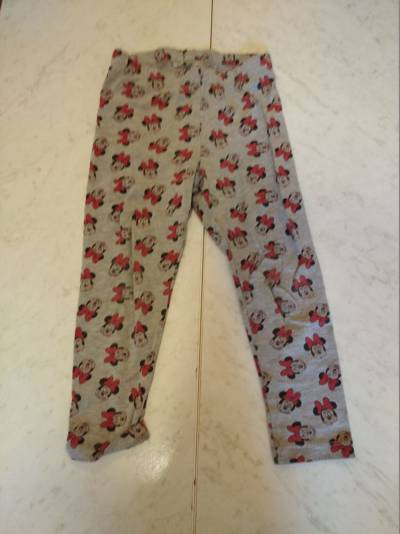

In [11]:
load_img(path)

In [12]:
img = load_img(path, target_size=(299, 299))

In [13]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [18]:
classes = [
    'dress',
     'hat',
     'longsleeve',
     'outwear',
     'pants',
     'shirt',
     'shoes',
     'shorts',
     'skirt',
     't-shirt'
]

In [20]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-0.61440134),
 'hat': np.float32(-3.8336682),
 'longsleeve': np.float32(-1.5247997),
 'outwear': np.float32(0.3305535),
 'pants': np.float32(7.7101426),
 'shirt': np.float32(2.0745015),
 'shoes': np.float32(-1.9504979),
 'shorts': np.float32(2.853074),
 'skirt': np.float32(-4.1353135),
 't-shirt': np.float32(-2.2438042)}